In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from numpy.random import normal 
import numpy as np   # arrays of ones, zeros,series, random numbers 
from scipy.stats import norm # pdf,cdf of normal random variables

We need a new module "pandas_datareader" for this section to download historical data. First let us install (not import) this module. The installation of new module for python is easy with one line of code as follows. 

In [ ]:
!pip install pandas_datareader 

After successful installation, you need to  import his module for this notebook. 

In [3]:
import pandas_datareader as pdr

Finally, we need to import datetime(which is already installed through ananconda) to define the format of date. 

In [4]:
import datetime 
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2018, 1, 1))

Then we have historical stock data of Apple Inc. 

In [5]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700


You can save this data for later use even without internet. 

In [6]:
aapl.to_csv("data/apple.csv")

If you cannot download data using yahoo finance, you can read it from local fire directly

In [7]:
aapl=pd.DataFrame.from_csv("data/apple.csv")

##  Background

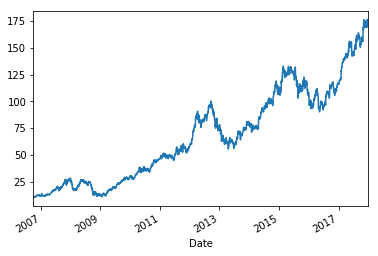

In [8]:
aapl['Close'].plot()
plt.show()

The figure above tracks the value of stock day by day in last 10 years.  If we take a look at this path from Aug, 2008 to the middle of 2013. 

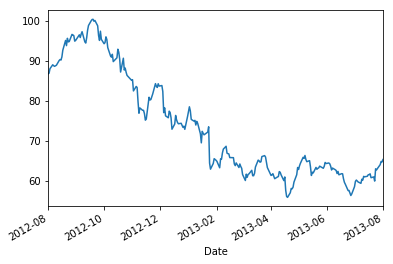

In [9]:
aapl.loc['2012-8-01':'2013-8-01','Close'].plot()

Apple's stock price has fallen by 40% over ten months, vaporizing almost $300 billion of market value. There are many reasons for this collapse. Apple's profit margin has dropped dramatically in this period. This margin compression, combined with a sharp slowdown in Apple's revenue growth has caused Apple's earnings to start actually shrinking. Wall Street does not pay much for companies whose earnings are shrinking.

If you invest, you have insurance in case the market has an "accident". Insurance for the stock market resembles car insurance. You can buy coverage that pays you if the market stumbles. 

How much should an investor expect to pay for this insurance? Your driving record affects your car insurance premium. The same logic applies to insurance for stocks. If there is a significant chance that the market will take a dive, then insurance costs. 

In this example, we need to compute what is the chance the 100 days' return is less than -40%? 

Let us start with daily return. Many business situations call for random variable that are able to represent a continuum of values. A typical and often used variable is normal random variable.  Normal random variable is often apply to represent the values, not just because the values' relative frequency is similar to normal distribution, also there is a rigorous basis for applying the normal distribution when the Central Limit Theorem (CLT) can be applied, and that covers a very broad set of practical applications.

## Norm distribution. 

You can imagine that there are infinite values in a population (black box) which follows normal distribution.  If you randomly select one from this box, which we call  "X", X is normal random variable. Let us take values 10000 times from a normal population with mean=0, stantard deviation =1. 

In [10]:
observed_value=pd.Series(normal(0,1,10000))


We have 10000 cases for variable X, which follows normal distribution.  We can get histogram. 

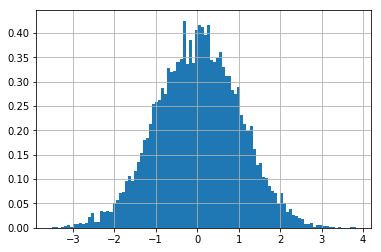

In [11]:
observed_value.hist(bins=100,normed=1)
plt.show()

You may found that this histogram is roughly symmetric  and bell-shaped. If we take infinite number of values from this population, the histogram will look more and more like normal distribution with mean=0 and standard distribution 

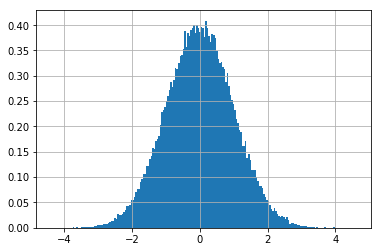

In [12]:
large_data=pd.Series(normal(0,1,100000))
large_data.hist(bins=200,normed=1)
plt.show()

The pdf (probability density function) for normal random variable is is given by 
$$
f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

We can plot this pdf as follows. 

<function matplotlib.pyplot.show>

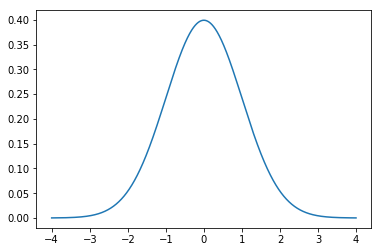

In [13]:
density=pd.DataFrame()
density['x']=np.arange(-4,4,0.001)
density['pdf']=norm.pdf(density['x'],0,1)
plt.plot(density['x'],density['pdf'])
plt.show

If we plot observed values together with pdf we have 

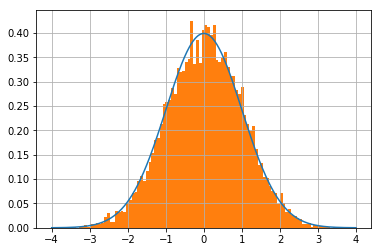

In [14]:
plt.plot(density['x'],density['pdf'])
observed_value.hist(bins=100,normed=1)
plt.show()

Relative frequency computed using 10000 observed values is very close to the  shape defined by normal pdf.  

Finally, from normal pdf, we can find the normal distribution is determined by two parameters: mean $\mu$ and standard deviation $\sigma$. If $(\mu,\sigma)$ are different, then the distributions, even they are normal, are still different.   

## Normality of Log Return 

We will introduce log return. Different from percentage return
$$
r_t=\frac{P_{t+1}-P_{t}}{P_{t}}
$$
Log return is computed  with the formula
$$
R_t=Log(P_{t+1})-log(P_t)
$$
There are more reasons why the log return is preferable to the percent return


- Log return is normally distributed. $R_t$ is normal random variable

- $R_t\approx r_t$ if $r_t$ is small.

- Additive 

Additive property is useful. For example, when we compute the log return for 100 days, 

$$Log(P_{t+100})-Log(P_t)=Log(P_{t+100})-Log(P_{t+99})+Log(P_{t+99})-Log(P_{t+98})+\ldots+Log(P_{t+1})-Log(P_{t})$$

The log return of 100 days is equal to the sum of daily log return of these 100 days.

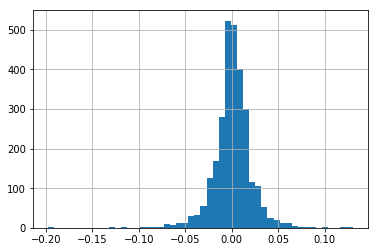

In [20]:
aapl['LogReturn']=np.log(aapl['Close'].shift(-1))-np.log(aapl['Close'])
aapl['LogReturn'].hist(bins=50)
plt.show()

We can use sample mean and sample standard deviation to estimate mean and variance of population LogReturn.

In [21]:
mu=aapl['LogReturn'].mean()
sigma=aapl['LogReturn'].std(ddof=1)
print(mu,sigma)

0.000975467759150088 0.020045447615854962


Suppose that our estimation is correct. Could we compute the probability that the apple price drops 40% in 100 days?

## Probability of Normal Random Variable. 

**Example** : What is the probability that the daily return is less than -5%? 

In previous discussion, we know that the daily return follows normal distribution $(\mu,\sigma)$. In python, we use norm.cdf() to compute probability. Suppose $X$ is a normal random variable with mean=100, and std=5, then norm.cdf(10,100,5) represents 
$$
P(X<10)
$$
which is called the probability for the left tail. If you want to compute $P(X>10)$, we have to use 
$$
P(X>10)=1-P(X<10)=1-norm.cdf(10,100,5)
$$
that is, norm.cdf() is to compute the probability area on the left side of cutoff value by default. 

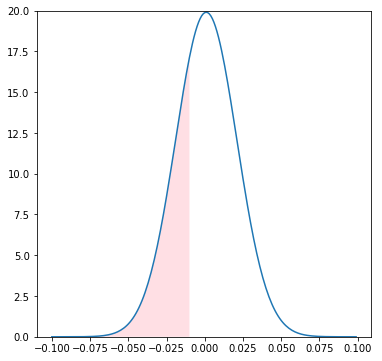

In [77]:
denApp=pd.DataFrame()
denApp['x']=np.arange(-0.1,0.1,0.001)
denApp['pdf']=norm.pdf(denApp['x'],mu,sigma)
plt.figure(figsize=(6,6))
plt.ylim(0,20)
#plt.axvline(-0.05,color='red')
plt.plot(denApp['x'],denApp['pdf'])
plt.fill_between(x=np.arange(-0.1,-0.01,0.0001), 
                 y2=0,
                 y1= norm.pdf(np.arange(-0.1,-0.01,0.0001),mu,sigma),
                 facecolor='pink',
                 alpha=0.5)
plt.show()

In [74]:
prob_return1=norm.cdf(-0.01,mu,sigma)
print("The probability  is ", prob_return1)

The probability  is  0.292007609966


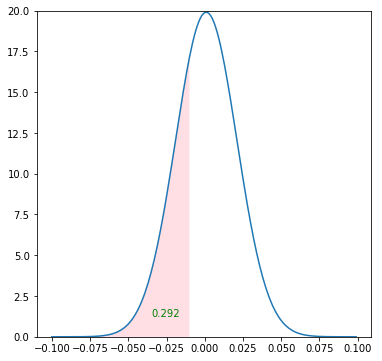

In [83]:
plt.figure(figsize=(6,6))
plt.ylim(0,20)
#plt.axvline(-0.05,color='red')
plt.plot(denApp['x'],denApp['pdf'])
plt.fill_between(x=np.arange(-0.1,-0.01,0.0001), 
                 y2=0,
                 y1= norm.pdf(np.arange(-0.1,-0.01,0.0001),mu,sigma),
                 facecolor='pink',
                 alpha=0.5)

plt.text(x=-0.035, y=1.25, s= round(prob_return1,3),color='green')
plt.show()

**Practice** Compute $P(LogReturn>0.05)$

##  Quantiles and Value at Risk 

Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with norm.ppf()(Percent point function). For example, $X$ is normal with mean=100 and std=20. We want to find 5% quantile, that is to find $a$, such that 
 $$
 P(X<a)=5\%
 $$

Then we can use

In [88]:
left=norm.ppf(0.05,100,20)
right=norm.ppf(0.95,100,20)
left,right


(67.102927460970534, 132.89707253902944)

We can plot pdf curve of this normal random variable with two quantiles left,right, labeled.

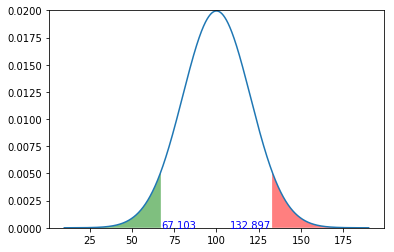

In [112]:
denNew=pd.DataFrame()
denNew['x']=np.arange(10,190,0.01)
denNew['pdf']=norm.pdf(denNew['x'],100,20)

igma100

plt.plot(denNew['x'],denNew['pdf'])
plt.ylim(0,0.02)
plt.fill_between(x=np.arange(10,left,0.1),
                 y2=0,
                 y1= norm.pdf(np.arange(10,left,0.1),100,20),
                 facecolor='green',
                 alpha=0.5)
plt.fill_between(x=np.arange(right,190,0.1),
                 y2=0,
                 y1= norm.pdf(np.arange(right,190,0.1),100,20),
                 facecolor='red',
                 alpha=0.5)

plt.text(x=left, y=0, s= round(left,3),color='blue')
plt.text(x=right-25, y=0, s= round(right,3),color='blue')
plt.show()

Value at risk (VaR) is a measure of the risk of loss for investments. It estimates how much a set of investments might lose (with a given probability). VaR is typically used by firms and regulators in the financial industry to gauge the amount of assets needed to cover possible losses.

For a given portfolio, time horizon, and probability p, the p VaR can be defined informally as the maximum possible loss during the time if we exclude worse outcomes whose probability is less than p. 

For example, if a portfolio of stocks has a one-day $5\%$ VaR of $\$1$ million, that means that there is a 0.05 probability that the portfolio will fall in value by more than \$1 million over a one-day period if there is no trading. Informally, a loss of $\$1$ million or more on this portfolio is expected on 1 day out of 20 days (because of 5\% probability). A loss which exceeds the VaR threshold is termed a "VaR breach"

If you buy and hold one share of Apple stock, compute $5\%$ VaR of your investment.

In [124]:
norm.ppf(0.05,mu,sigma)

-0.031996359455654697

The chance that you will lose more than $31\%$ of investment in one day is $5\%$.  

## Sum of Independent Normal Variable. 

We want to find the distribution of 100 days' daily return in order to find probability of extreme event that the stock price drop 40% in 100 days. 


But we only have the distribution of daily return. Efficient market theory believes that daily return are independent across different days. Hence we have 100 Log Return are independent and have identical distribution. These 100 random variables(daily return ) are called i.i.d. If they are i.i.d, the sum of 100 normal random variables are again normal. But what are the mean and variance ?

In general, for n random variables, not necessarily independent, 
$$
\mu_{X_1+X_2+\ldots+X_n}=\mu_{X_1}+\mu_{X_2}+\ldots+\mu_{X_n}
$$
To compute variance of sum, we need one more condition, these variables have to be independent. If they are independent 
$$
\sigma^2_{X_1+X_2+\ldots+X_n}=\sigma^2_{X_1}+\sigma^2_{X_2}+\ldots+\sigma^2_{X_n}
$$


In our example, we will have 
$$
\mu_{100}=\mu+\mu+\ldots+\mu=100\mu
$$
$$
\sigma^2_{100}=sigma^2+\sigma^2+\ldots+\sigma^2=100\sigma^2
$$
$$
\sigma_{10}=\sqrt{100}\sigma
$$

If they are not independent , the formula to compute variance becomes more complicated in which we need to compute the association among variables. 

where $\mu,\sigma$ is the mean and standard deviation of daily return. Can you plot the pdf curve for the return of 100 days?

In [125]:
mu100=100*mu
sigma100=10*sigma
mu100,sigma100

(0.0975467759150088, 0.2004544761585496)

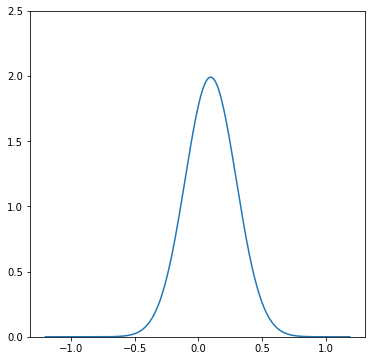

In [132]:
den100=pd.DataFrame()
den100['x']=np.arange(-1.2,1.2,0.01)
den100['pdf']=norm.pdf(den100['x'],mu100,sigma100)
plt.figure(figsize=(6,6))
plt.ylim(0,2.5)
#plt.axvline(-0.05,color='red')
plt.plot(den100['x'],den100['pdf'])
plt.show()

Next we compute the probability

In [133]:
norm.cdf(-0.4,mu100,sigma100)

0.0065306477556350048

That means that, there will be less than  0.7% chance that apple price will drop 40% in 100 days.

Another important  formulas for random variables $X$ are 
$$
\mu_{10X}=10\mu_{X}
$$
$$
\sigma_{10X}=10\sigma_X
$$

That is, if $\mu,\sigma$ are the mean and standard deviation of one stock, $10\mu,10\sigma$ are the mean and standard devation of 10 shares of stocks. 

## Central Limite Theorem 

In the example above, if daily return is not normal distributed, is yearly return normal? if not normal, how can we compute the probability?


Fortunately, we have central limit theorem for this case. 

**Central Limite Theorem:** When independent random variables, i.e. daily return,  are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. 

It is equivalent to say, even if $R_t$ is not normal, 
$$
\frac{R_t+R_{t+1}+\ldots+R_{t+n}}{n}
$$
is normal approximately if $n$ is large enough. 

Let us say, $n$ is large enough if $n>40$. It means that 
$$
\frac{R_t+R_{t+1}+\ldots+R_{t+100}}{100}
$$
is a normal random variable approximately. Hence 
$$
R_t+R_{t+1}+\ldots+R_{t+100}
$$
is normally distributed approximately. Hence we can apply normal rule compute the probability and quantiles for the return of 100 days. 